<a href="https://colab.research.google.com/github/upparasudharani/Diabetes-prediction/blob/main/dkd_410_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore")
df = pd.read_excel("/content/Copy of dataset_new3_411.xlsx")
df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     410 non-null    int64  
 1   BU      410 non-null    float64
 2   SCr     410 non-null    float64
 3   HbA1c   405 non-null    float64
 4   Class   410 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 16.1 KB


In [15]:
df['Class']

0      0
1      1
2      0
3      1
4      0
      ..
405    1
406    0
407    0
408    1
409    1
Name: Class, Length: 410, dtype: int64

63.02468292682927
7.4593086419753085
Age      0
BU       0
SCr      0
HbA1c    0
Class    0
dtype: int64


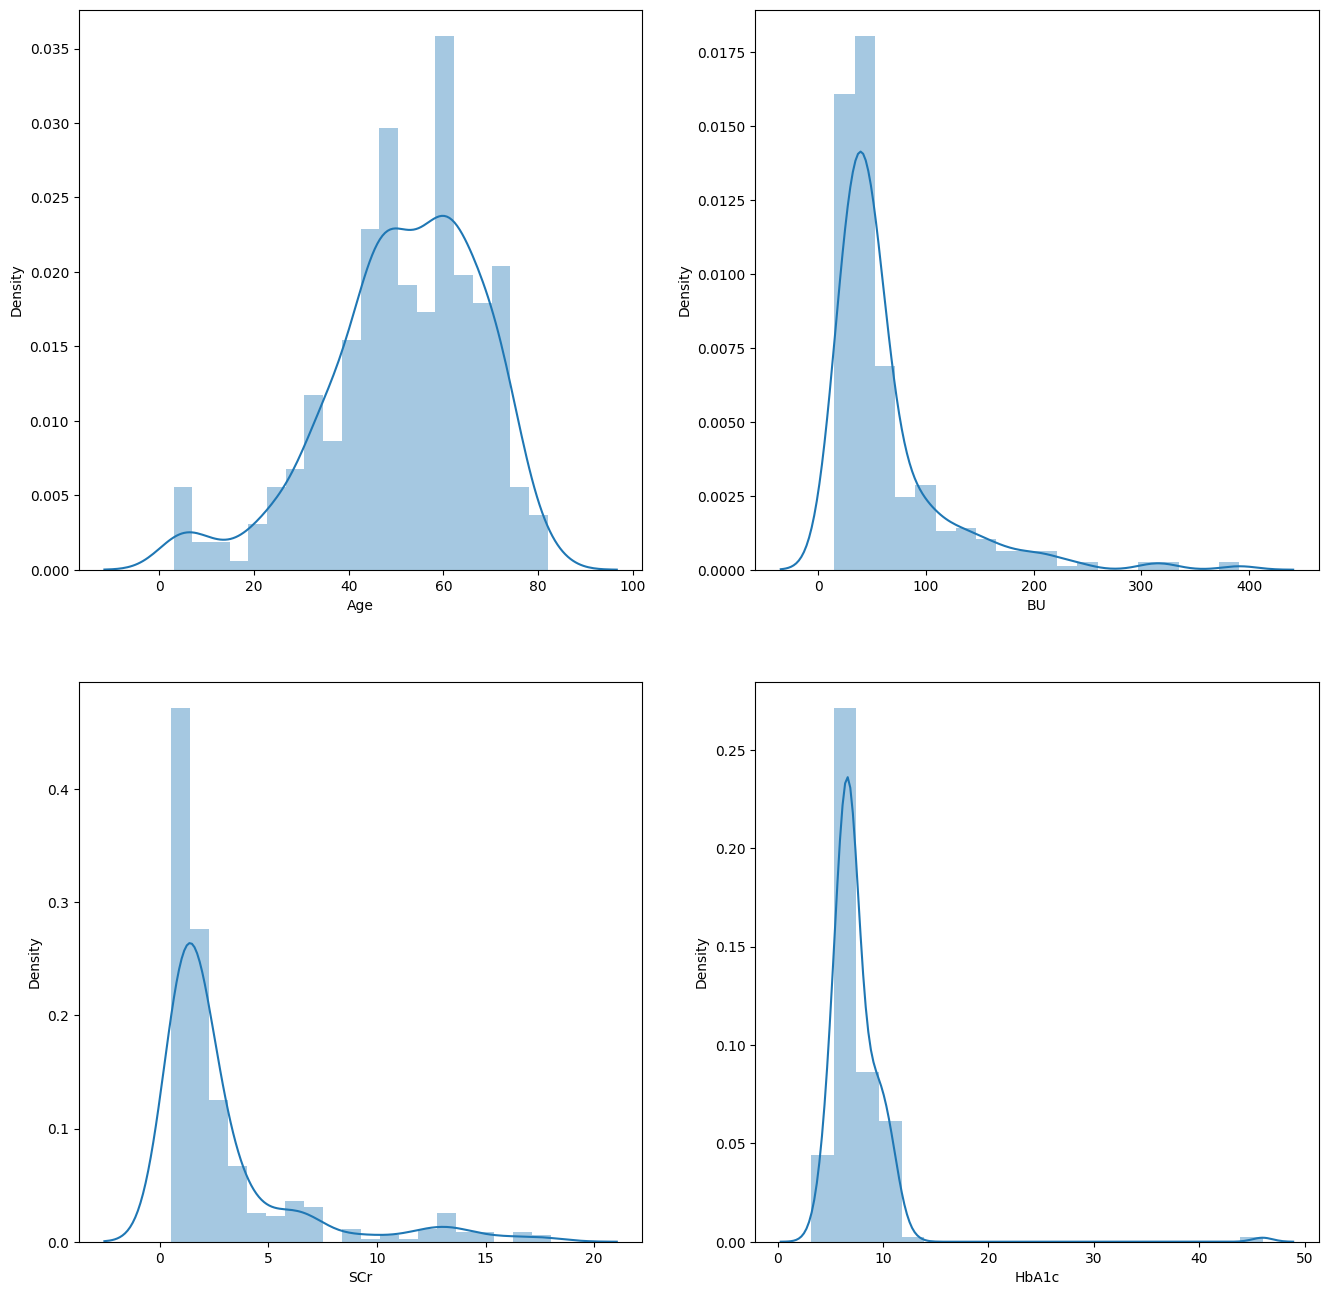

In [16]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.BU, bins = 20, ax=ax[0,1]) 
sns.distplot(df.SCr, bins = 20, ax=ax[1,0]) 
sns.distplot(df.HbA1c, bins = 20, ax=ax[1,1]) 


df.describe()
df_copy = df.copy(deep=True)
df_copy[['Age','BU','SCr','HbA1c']] = df_copy[['Age','BU','SCr','HbA1c']].replace(0,np.NaN)

print(df['BU'].mean())
df['BU'] = df['BU'].fillna(53.68)
print(df['HbA1c'].mean())
df['HbA1c'] = df['HbA1c'].fillna(6.87)
print(df.isnull().sum())

In [17]:

#Replace categorical values with numbers

df.describe()
df.info() 

df_copy['Age'].fillna(df_copy['Age'].mean(), inplace=True)

df_copy['BU'].fillna(df_copy['BU'].median(), inplace=True)
df_copy['SCr'].fillna(df_copy['SCr'].median(), inplace=True)
df_copy['HbA1c'].fillna(df_copy['HbA1c'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     410 non-null    int64  
 1   BU      410 non-null    float64
 2   SCr     410 non-null    float64
 3   HbA1c   410 non-null    float64
 4   Class   410 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 16.1 KB


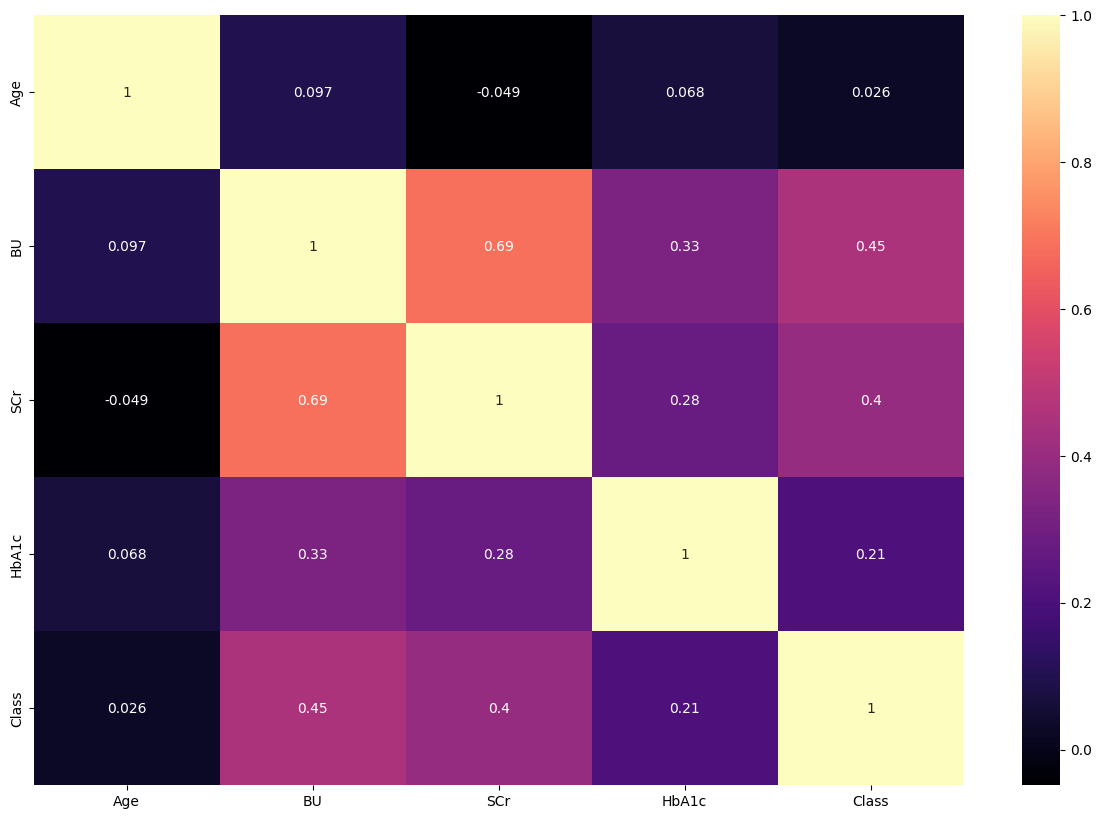

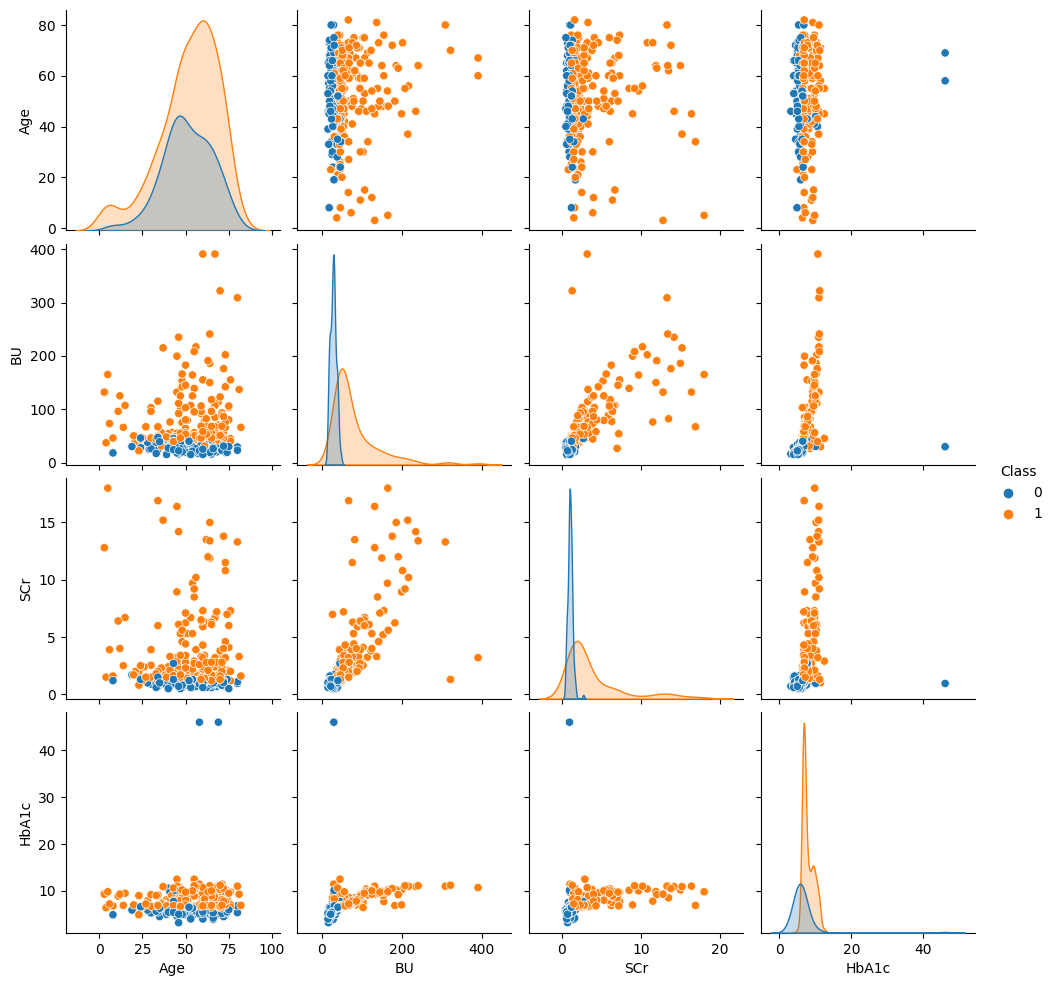

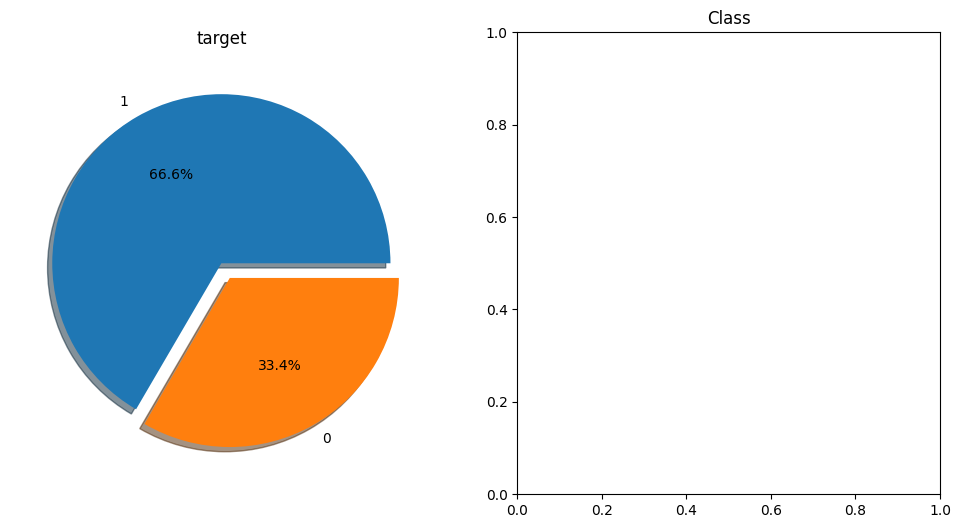

In [18]:
df.corr()

f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, cmap = "magma" )

plt.show()

sns.pairplot(df,hue='Class')

df.isnull().sum()

f,ax=plt.subplots(1,2,figsize=(12,6))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')

ax[1].set_title('Class')
plt.show()

In [19]:

X = df[['Age','BU','SCr','HbA1c']]
y = df['Class']
cols = X.columns
index = X.index
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df[['Age','BU','SCr','HbA1c']], df['Class'], test_size=0.20, random_state=0)
     
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [20]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [22]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()


df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.890244,0.923077,0.905660
Support Vector Machines,0.756098,0.653846,0.944444
Decision Trees,0.914634,0.942308,0.924528
Random Forest,0.951220,0.961538,0.961538
Naive Bayes,0.817073,0.730769,0.974359
K-Nearest Neighbor,0.865854,0.903846,0.886792


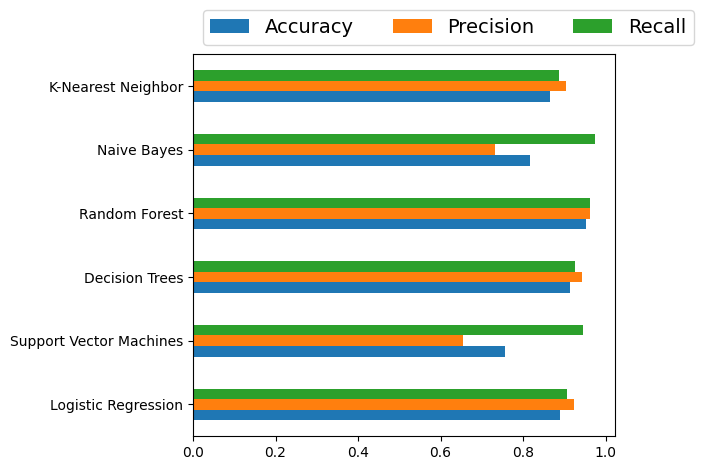

In [23]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

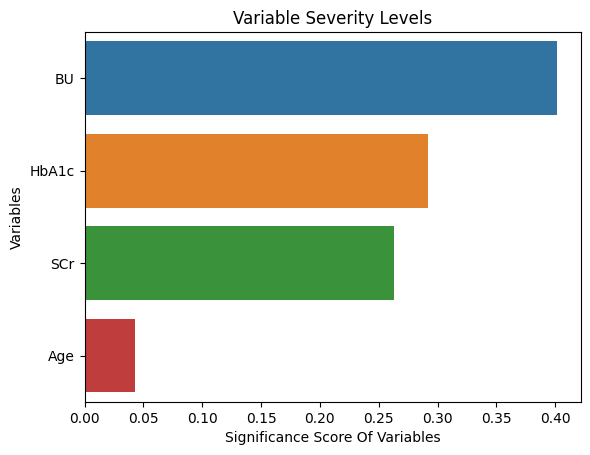

In [24]:
from sklearn.ensemble import RandomForestClassifier
     

model = RandomForestClassifier()
model.fit(X_train,y_train)

cross_val_score(model, X, y, cv = 10).mean()

feature_imp = pd.Series(model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


In [26]:
y_pred = model.predict(X_test)
y_pred


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.96      0.94      0.95        53

    accuracy                           0.94        82
   macro avg       0.93      0.94      0.93        82
weighted avg       0.94      0.94      0.94        82



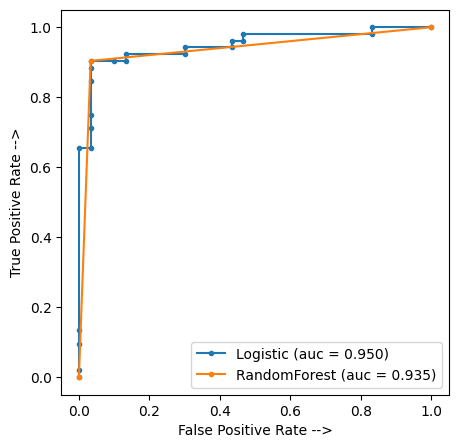

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 2, random_state = 4)

# Train the model on training data
model_RF.fit(X_train, y_train)

 
prediction_test_RF = model_RF.predict(X_test)




from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)



RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_test_RF)
auc_RF = auc(RF_fpr, RF_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(RF_fpr, RF_tpr, marker='.', label='RandomForest (auc = %0.3f)' % auc_RF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:

Age = input("Age:")

BU =input("Blood Urea:")
SCr = input("Serum Creatin :")
HbA1c =input("Hemoglobin:")
prediction = model.predict([[ Age, BU, SCr,HbA1c]])
prediction

Age:25
Blood Urea:35
Serum Creatin :1
Hemoglobin:5


array([0])